## Projet de MODS206 - Nowcasting and Dynamic Factor Models

### BASTIDE Simon, RISTORCELLI Ulysse, VUJASINOVIC Thomas

Analyse des bases de données de base, en se restreignant aux fréquences mensuelles :

In [2]:
#imports
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio
import datetime as dt
pio.templates.default = "plotly_white"

In [3]:
#imports de capitalisations boursières des grandes entreprises du tourisme
def get_data(assets, start_date, end_date):
    """
    Récupère les données des actions sur Yahoo Finance
    """
    return yf.download(assets, start=start_date, end=end_date)['Adj Close']

assets = ['0H59.IL', 'ALVDM.PA','SW.PA', 'ELIOR.PA', 'AF.PA']
N = 5000 # Complétez avec le nombre de jours historiques

start_date = dt.datetime.now() - dt.timedelta(days=N)
end_date = dt.datetime.now()

data = get_data(assets, start_date, end_date)
data
monthly_data = data.resample('M').mean()
monthly_data


[*********************100%%**********************]  5 of 5 completed


,0H59.IL,AF.PA,ALVDM.PA,ELIOR.PA,SW.PA
Date,,,,,
2010-07-31,20.325060,55.937206,15.230890,NaN,22.197310
2010-08-31,19.460198,55.089672,15.454808,NaN,21.123393
2010-09-30,20.874527,56.599277,15.673765,NaN,21.485370
2010-10-31,22.767188,62.461064,17.284561,NaN,21.603976
2010-11-30,24.577961,68.289829,18.513290,NaN,21.647753
...,...,...,...,...,...
2023-11-30,30.999091,11.932545,112.863636,2.109091,69.859970
2023-12-31,34.373947,12.981158,120.447368,2.639368,70.274131
2024-01-31,35.514091,12.302000,124.954545,2.705000,74.967375


In [4]:
# Affichage des données superposé avec plotly pour une année 
fig = go.Figure()
for a in assets:
    fig.add_trace(go.Scatter(x=data.index, y=data[a], name=a))
fig.update_layout(title='Evolution des prix des actifs', yaxis_title='Prix en $')
fig.show()

In [5]:

# Cleaning sight seeing demand data
sight_seeing_demand_df=pd.read_csv('databases/famille_SUIVI-DEMANDE-TOURISTIQUE/valeurs_mensuelles.csv', sep=';')
sight_seeing_demand_df=sight_seeing_demand_df.drop(sight_seeing_demand_df[sight_seeing_demand_df['Libellé'] == 'Codes'].index)
sight_seeing_demand_df=sight_seeing_demand_df.drop('Période', axis=1)
sight_seeing_demand_df = sight_seeing_demand_df.transpose()
sight_seeing_demand_df.columns = sight_seeing_demand_df.iloc[0]
sight_seeing_demand_df = sight_seeing_demand_df.drop(sight_seeing_demand_df.index[:3])
sight_seeing_demand_df = sight_seeing_demand_df.apply(pd.to_numeric, errors='ignore')
sight_seeing_demand_df = sight_seeing_demand_df / sight_seeing_demand_df.iloc[0]
sight_seeing_demand_df

# Cleaning overnight stays data
overnight_stays_df=pd.read_csv('databases/famille_NUITEE/valeurs_mensuelles.csv', sep=';')
overnight_stays_df=overnight_stays_df.drop(overnight_stays_df[overnight_stays_df['Libellé'] == 'Codes'].index)
overnight_stays_df=overnight_stays_df.drop('Période',axis=1)

regions=[
    "Auvergne-Rhône-Alpes", "Bourgogne-Franche-Comté", "Bretagne",
    "Centre-Val de Loire", "Corse", "Grand Est", "Hauts-de-France",
    "Ile-de-France", "Normandie", "Nouvelle-Aquitaine", "Occitanie",
    "Pays de la Loire", "Provence Alpes Côte d’Azur"
]

overnight_stays_df_t = overnight_stays_df.transpose()
overnight_stays_df_t.columns = overnight_stays_df_t.iloc[0]
overnight_stays_df_t = overnight_stays_df_t.drop(overnight_stays_df_t.index[:3])

occupation_columns = [col for col in overnight_stays_df_t.columns if "Taux d'occupation dans l'hôtellerie" in col]
overnight_columns = [col for col in overnight_stays_df_t.columns if "Nuitées dans l'hôtellerie - Total -" in col and "Série arrêtée" not in col]
arrival_columns= [col for col in overnight_stays_df_t.columns if "Arrivées dans l'hôtellerie - Total -" in col and "Série arrêtée" not in col]

selected_occupation_columns = [col for col in occupation_columns if any(region in col for region in regions)]
selected_overnight_columns = [col for col in overnight_columns if any(region in col for region in regions)]
selected_arrival_columns = [col for col in arrival_columns if any(region in col for region in regions)]

selected_columns = selected_arrival_columns+selected_occupation_columns+selected_overnight_columns

overnight_stays_df_t =overnight_stays_df_t[selected_columns]
overnight_stays_df_t=overnight_stays_df_t['2011-01':]


# Normalizoing the data
overnight_stays_df_t = overnight_stays_df_t.apply(pd.to_numeric, errors='ignore')
overnight_stays_df_t = overnight_stays_df_t / overnight_stays_df_t.iloc[0]
overnight_stays_df_t

Libellé,Arrivées dans l'hôtellerie - Total - Occitanie,Arrivées dans l'hôtellerie - Total - Pays de la Loire,Arrivées dans l'hôtellerie - Total - Bourgogne-Franche-Comté,Arrivées dans l'hôtellerie - Total - Corse-du-Sud,Arrivées dans l'hôtellerie - Total - Grand Est,Arrivées dans l'hôtellerie - Total - Auvergne-Rhône-Alpes,Arrivées dans l'hôtellerie - Total - Normandie,Arrivées dans l'hôtellerie - Total - Corse,Arrivées dans l'hôtellerie - Total - Hauts-de-France,Arrivées dans l'hôtellerie - Total - Nouvelle-Aquitaine,...,Nuitées dans l'hôtellerie - Total - Normandie,Nuitées dans l'hôtellerie - Total - Auvergne-Rhône-Alpes,Nuitées dans l'hôtellerie - Total - Grand Est,Nuitées dans l'hôtellerie - Total - Nouvelle-Aquitaine,Nuitées dans l'hôtellerie - Total - Occitanie,Nuitées dans l'hôtellerie - Total - Corse-du-Sud,Nuitées dans l'hôtellerie - Total - Bourgogne-Franche-Comté,Nuitées dans l'hôtellerie - Total - Haute-Corse,Nuitées dans l'hôtellerie - Total - Centre-Val de Loire,Nuitées dans l'hôtellerie - Total - Hauts-de-France
2011-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011-02,1.119617,1.064378,1.147860,1.188718,1.047836,1.095344,1.233184,1.235294,1.073171,1.141089,...,1.209302,1.145089,1.052786,1.141707,1.188474,1.219235,1.134247,1.214572,0.969595,1.042308
2011-03,1.277512,1.227468,1.369650,1.625641,1.284738,1.175166,1.479821,1.882353,1.262195,1.482673,...,1.465116,1.199219,1.322581,1.528180,1.327103,1.777778,1.339726,1.972778,1.226351,1.251923
2011-04,1.765550,1.476395,1.583658,5.793846,1.542141,1.074279,2.008969,5.882353,1.487805,1.940594,...,2.098837,0.938616,1.590909,2.070853,2.009346,6.676225,1.545205,6.425140,1.591216,1.451923
2011-05,2.031100,1.510730,1.704280,11.798974,1.624146,1.044346,2.017937,11.411765,1.503049,1.997525,...,2.110465,0.840960,1.683284,2.165862,2.395639,13.247909,1.682192,12.277022,1.844595,1.490385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09,2.327751,1.969957,1.968872,12.532308,1.986333,1.444568,2.372197,13.352941,1.713415,2.485149,...,2.436047,1.145647,2.080645,2.663446,2.633956,16.401434,1.950685,16.527622,2.070946,1.703846
2023-10,1.916268,1.686695,1.579767,7.002051,1.753986,1.157428,1.883408,6.900000,1.548780,2.086634,...,1.959302,0.920759,1.815249,2.204509,2.121495,8.436081,1.591781,7.010408,1.726351,1.548077
2023-11,1.253589,1.291845,1.140078,1.631795,1.419134,0.927938,1.327354,1.823529,1.237805,1.445545,...,1.366279,0.742188,1.473607,1.470209,1.305296,1.574074,1.169863,1.908727,1.246622,1.273077
2023-12,1.296651,1.111588,1.217899,1.372308,1.874715,1.186253,1.183857,1.523529,1.310976,1.475248,...,1.223837,1.059710,1.989736,1.434783,1.299065,1.240143,1.169863,1.566053,1.192568,1.288462


In [10]:
# Indice de chiffre d'affaire tourisme
services_GDP_df=pd.read_csv('databases/famille_SERVICES/valeurs_mensuelles.csv', sep=';')
services_GDP_df=services_GDP_df.drop(services_GDP_df[services_GDP_df['Libellé'] == 'Codes'].index)
services_GDP_df=services_GDP_df.drop('Période', axis=1)

services_GDP_df_t = services_GDP_df.transpose()
# Rename columns using the first row, cleansing of not useful columns
services_GDP_df_t.columns = services_GDP_df_t.iloc[0]
services_GDP_df_t = services_GDP_df_t.drop(services_GDP_df_t.index[:3])

services_GDP_df_t=services_GDP_df_t['2011-01':]

services_GDP_df_t = services_GDP_df_t.iloc[:, [3,5,6,12,13,22,23,24,26,70,77,78,80,93,94,96,117]]
services_GDP_df_t

Libellé,"Indice de chiffre d'affaires - Transport ferroviaire interurbain de voyageurs (NAF rév. 2, niv. classe poste 49.10)","Indice de chiffre d'affaires - Transports urbains et suburbains de voyageurs (NAF rév. 2, niv. classe poste 49.31)","Indice de chiffre d'affaires - Transports de voyageurs par taxis (NAF rév. 2, niv. classe poste 49.32)","Indice de chiffre d'affaires - Transports fluviaux de passagers (NAF rév. 2, niv. classe poste 50.30)","Indice de chiffre d'affaires - Transports aériens de passagers (NAF rév. 2, niv. classe poste 51.10)","Indice de chiffre d'affaires - Hôtels et hébergement similaire (NAF rév. 2, niv. classe poste 55.10)","Indice de chiffre d'affaires - Hébergement touristique et autre hébergement de courte durée (NAF rév. 2, niv. classe poste 55.20)","Indice de chiffre d'affaires - Terrains de camping et parcs pour caravanes ou véhicules de loisirs (NAF rév. 2, niv. classe poste 55.30)","Indice de chiffre d'affaires - Restaurants et services de restauration mobile (NAF rév. 2, niv. classe poste 56.10)","Indice de chiffre d'affaires - Activités des agences de publicité (NAF rév. 2, niv. classe poste 73.11)","Indice de chiffre d'affaires - Activités vétérinaires (NAF rév. 2, niv. classe poste 75.00)","Indice de chiffre d'affaires - Location et location-bail de voitures et de véhicules automobiles légers (NAF rév. 2, niv. classe poste 77.11)","Indice de chiffre d'affaires - Location et location-bail d'articles de loisirs et de sport (NAF rév. 2, niv. classe poste 77.21)","Indice de chiffre d'affaires - Activités des agences de voyage (NAF rév. 2, niv. classe poste 79.11)","Indice de chiffre d'affaires - Activités des voyagistes (NAF rév. 2, niv. classe poste 79.12)","Indice de chiffre d'affaires - Activités de sécurité privée (NAF rév. 2, niv. classe poste 80.10)","Indice de chiffre d'affaires - Gestion des sites et monuments historiques et des attractions touristiques similaires (NAF rév. 2, niv. classe poste 91.03)"
2011-01,88.25,73.81,61.53,141.54,165.72,124.89,120.92,61.59,84.78,95.64,59.29,71.21,59.4,142.61,210.11,76.17,97.69
2011-02,80.93,76.03,61.94,146.46,158.92,125.77,117.34,64.88,86.0,99.08,59.85,71.5,60.63,154.38,202.5,72.13,97.53
2011-03,81.14,75.23,62.22,156.47,157.4,124.85,121.56,60.02,85.51,100.81,60.06,68.48,51.38,161.81,271.68,75.35,94.09
2011-04,88.6,73.74,61.42,162.1,161.56,127.35,118.18,61.66,86.82,99.88,59.66,72.79,49.06,161.81,207.78,74.47,106.54
2011-05,86.83,76.11,62.19,169.78,166.07,129.52,119.8,61.63,86.99,101.15,60.03,68.94,60.38,159.0,223.88,75.08,95.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09,140.47,117.55,158.63,275.14,192.1,219.05,179.47,149.33,168.53,122.4,121.62,128.83,154.03,291.47,364.03,119.28,199.99
2023-10,142.01,119.92,158.29,266.35,220.62,212.78,190.46,143.94,168.43,113.69,121.62,128.49,163.22,285.16,337.47,119.12,197.64
2023-11,136.6,121.85,159.35,292.25,212.01,204.76,187.97,146.28,167.27,112.7,120.75,131.94,164.81,288.8,346.03,118.71,233.3
2023-12,141.14,117.24,157.86,286.85,210.75,208.2,187.74,153.35,169.17,112.7,124.3,131.35,165.21,303.04,358.83,121.67,226.06


In [6]:
# Cleaning exchange rate data
change_rate_pd=pd.read_csv('databases/euro change rates.csv',sep=',')

change_rate_pd['Date'] = pd.to_datetime(change_rate_pd['Date'])

change_rate_pd=change_rate_pd[change_rate_pd['Date']>"2010-12-31"]
change_rate_pd.drop(columns=['Unnamed: 42'], inplace=True)

change_rate_pd = change_rate_pd.resample('M', on='Date').mean()

change_rate_pd

,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,LTL,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,1.335967,110.380952,1.9558,NaN,24.448810,7.451838,NaN,0.847117,275.326190,3.4528,...,4.790919,60.716086,1495.502857,16.192614,4.089490,1.743543,59.088952,1.719300,40.826571,9.265152
2011-02-28,1.364895,112.768000,1.9558,NaN,24.276550,7.455480,NaN,0.846355,271.152500,3.4528,...,4.993850,62.014225,1524.990500,16.472735,4.154105,1.792520,59.557600,1.742120,41.917500,9.812615
2011-03-31,1.399917,114.397391,1.9558,NaN,24.393000,7.457430,NaN,0.866533,270.890435,3.4528,...,4.986696,62.952635,1568.054348,16.806339,4.248304,1.887739,60.870391,1.775735,42.506391,9.686152
2011-04-30,1.444179,120.415263,1.9558,NaN,24.300895,7.457405,NaN,0.882913,265.287368,3.4528,...,4.957332,64.112789,1567.515789,16.921132,4.350226,1.833079,62.361211,1.802416,43.434474,9.719958
2011-05-31,1.434864,116.467273,1.9558,NaN,24.381318,7.456614,NaN,0.877877,266.958182,3.4528,...,4.974045,64.473455,1555.989545,16.717650,4.327218,1.802441,61.952773,1.776250,43.397955,9.846141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.080823,161.844091,1.9558,NaN,24.484773,7.458086,NaN,0.870454,379.194545,NaN,...,4.111768,90.010200,1412.571818,18.787691,5.066686,1.803295,60.284591,1.457527,38.327364,20.039686
2023-12-31,1.090305,157.212632,1.9558,NaN,24.477579,7.455637,NaN,0.861683,381.803158,NaN,...,4.005658,90.800937,1423.126316,18.766526,5.082553,1.755584,60.593000,1.453263,38.175579,20.337326
2024-01-31,1.090514,159.458182,1.9558,NaN,24.715818,7.457200,NaN,0.858731,382.041818,NaN,...,4.049314,90.634745,1447.184091,18.626832,5.110464,1.767264,61.089636,1.456873,38.400682,20.516095


In [7]:
# Cleaning cpi index data
cpi_index_df=pd.read_csv("databases/CPI deflated EER-41Euro.csv",sep=',')
pd.to_datetime(cpi_index_df['DATE'])
cpi_index_df=cpi_index_df[cpi_index_df['DATE']>"2010-12-31"]
cpi_index_df


,DATE,TIME PERIOD,CPI deflated EER-41/Euro (EXR.M.E03.EUR.ERC0.A)
216,2011-01-31,2011Jan,96.7008
217,2011-02-28,2011Feb,97.8516
218,2011-03-31,2011Mar,99.3829
219,2011-04-30,2011Apr,100.9849
220,2011-05-31,2011May,99.9160
...,...,...,...
369,2023-10-31,2023Oct,95.0032
370,2023-11-30,2023Nov,95.3326
371,2023-12-31,2023Dec,94.8389
372,2024-01-31,2024Jan,95.1396


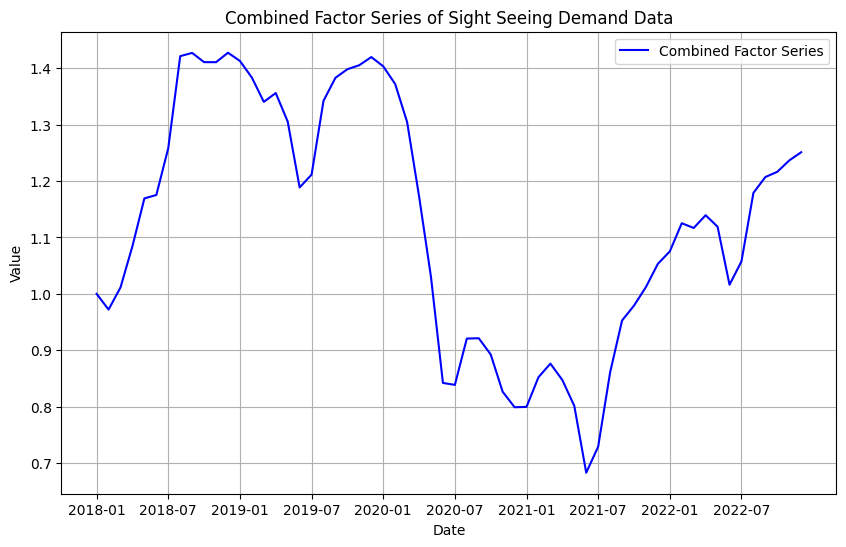

In [8]:
# Factor series using simple moving average
def calculate_sma(series, window=10):
    return series.rolling(window=window, min_periods=1).mean()  

sight_seeing_demand_df_numeric = sight_seeing_demand_df.apply(pd.to_numeric, errors='coerce')
factor_series = sight_seeing_demand_df_numeric.apply(calculate_sma)
combined_factor_series = factor_series.mean(axis=1)  


tick_frequency = 6 
plt.figure(figsize=(10, 6))
plt.plot(combined_factor_series.index, combined_factor_series.values, label='Combined Factor Series', color='blue')
plt.title('Combined Factor Series of Sight Seeing Demand Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(combined_factor_series.index[::tick_frequency])
plt.show()

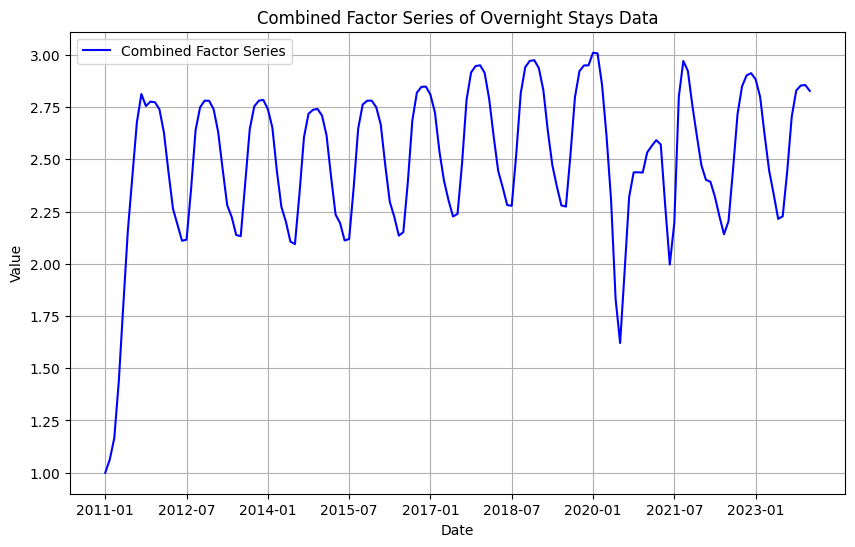

In [9]:
factor_series_2 = overnight_stays_df_t.apply(calculate_sma)
combined_factor_series_2 = factor_series_2.mean(axis=1)  


tick_frequency = 6 
plt.figure(figsize=(10, 6))
plt.plot(combined_factor_series_2.index, combined_factor_series_2.values, label='Combined Factor Series', color='blue')
plt.title('Combined Factor Series of Overnight Stays Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(combined_factor_series_2.index[::tick_frequency*3])
plt.show()